In [2]:
# Importando a biblioteca

import pandas as pd

df = pd.read_csv('feedbacks.csv', delimiter=';')

#### Modelo Imperativo

Na célula abaixo, a leitura do código é feita em um arquivo CSV que armazena as opiniões dos usuários, sendo que cada avaliação possui uma pontuação correspondente.
O Net Promoter Score (NPS) é determinado pela variação entre a porcentagem de defensores (pontuação >= 9) e críticos (pontuação <= 6), multiplicada por 100.
A execução ocorre de forma imperativa, seguindo uma sequência de instruções.

In [ ]:
notas = df['nota']

negativos = 0
positivos = 0

for nota in notas:
  if nota >= 9:
    negativos += 1
  elif nota <= 6:
    positivos += 1

nps = (negativos - positivos) / len(notas) * 100

print(nps)

#### Modelo Funcional

Na célula abaixo, adotei uma perspectiva funcional para derivar o NPS a partir das informações de feedback.
A função "calcular_nps" foi criada para envolver a lógica do cálculo. 
Essa implementação demonstra uma distinção mais evidente de responsabilidades em comparação com a abordagem imperativa, incluindo melhorias específicas no código.

In [ ]:
def calcular_nps(notas):
  negativos = notas.apply(lambda nota: nota <= 6).sum()
  positivos = notas[notas >= 9].count()

  return (positivos - negativos) / len(notas) * 100

notas = df['nota']

nps = calcular_nps(notas)

print(nps)

#### Modelo Orientado a Objetos (POO).

Na célula abaixo, optei por uma abordagem Orientada a Objetos (OO) para a determinação do NPS a partir das avaliações dos usuários.
Duas classes são apresentadas, sendo:

Feedback, que representa uma única avaliação de usuário;
AnalisadorFeedback, utilizado para calcular o NPS a partir de uma lista de Feedbacks.
A POO proporciona uma representação mais clara dos dados e comportamentos relacionados ao cálculo do NPS.
Assim, nossa solução estará apta a acompanhar as futuras evoluções do projeto.

In [ ]:
class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    # Comprensão de listas para filtragem dos Feedbacks, Python permite isso.
    negativos = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    positivos = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (positivos - negativos) / len(self.feedbacks) * 100

feedbacks = df.apply(lambda linha: Feedback(linha['nota'], linha['comentario']), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

#### Visualização gráfica do NPS

Na célula abaixo, vamos usar a biblioteca matplotlib para criar um gráfico sobre o método até aqui apresentado.

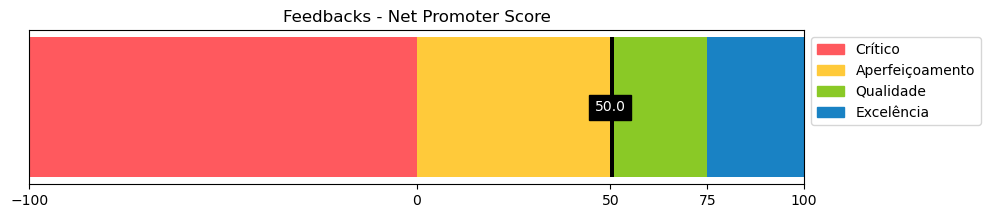

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar as métricas
METRICAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
VALORES = [-100, 0, 50, 75, 100]
CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def criar_grafico_metricas(nps):
  # Inicia a figura e os eixos.
  fig, ax = plt.subplots(figsize=(10, 2))

  # Itera sobre as métricas para criar a barra de cores do gráfico.
  for i, metrica in enumerate(METRICAS):
    ax.barh([0], width=VALORES[i+1]-VALORES[i], left=VALORES[i], color=CORES[i])

  # Cria o "traço" que vai indicar as métricas no gráfico.
  ax.barh([0], width=1, left=nps, color='black')
  # Remove os ticks do eixo Y
  ax.set_yticks([])
  # Define os limites do eixo X
  ax.set_xlim(-100, 100)
  # Define os ticks do eixo X
  ax.set_xticks(VALORES)

  # Inclui o valor das métricas, que fica alinhado com o traço.
  plt.text(nps, 0, f'{nps:.1f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  # Legenda do gráfico.
  patches = [mpatches.Patch(color=CORES[i], label=METRICAS[i]) for i in range(len(METRICAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  # Título do gráfico.
  plt.title('Feedbacks - Net Promoter Score')

  # Apresentação do gráfico.
  plt.show()

# Vamos criar o gráfico com o valor de exemplo
criar_grafico_metricas(nps)
